# Linear Regression 선형회귀

공부 시간에 따른 시험 점수

In [99]:
import matplotlib.pyplot as plt
import pandas as pd

In [100]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [101]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [102]:
X = dataset.iloc[:, :-1].values # 처음부터 마지막 컬럼 직적까지의 데이터 [독립변수 - 원인]
y = dataset.iloc[:, -1].values #마지막 칼럼 데이터 [종속 변수 - 결과]

In [103]:
X,y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [104]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # 객체 생성
reg.fit(X,y) # 학습(모델 생성)

LinearRegression()

In [105]:
y_pred = reg.predict(X) # X에 대한 예측 값
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

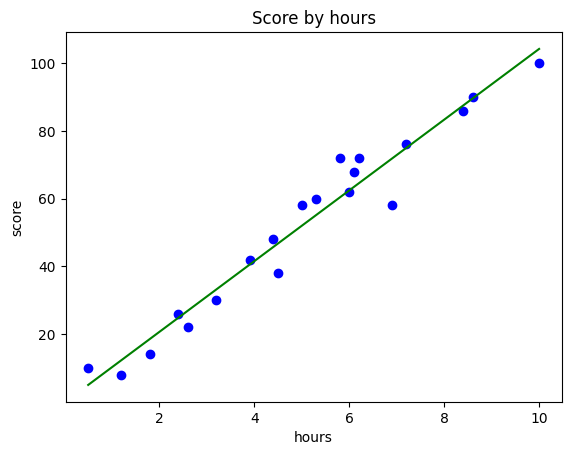

In [106]:
plt.scatter(X, y, color="blue") # 산점도
plt.plot(X, y_pred, color = "green") # 선 그래프
plt.title("Score by hours") #제목

plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [107]:
print('9시간 공부했을 때 예상 점수? :' , reg.predict([[9]])) # [[9], [8], [7]]

9시간 공부했을 때 예상 점수? : [93.77478776]


In [108]:
reg.coef_ # 기울기

array([10.44369694])

In [109]:
reg.intercept_ # y절편

-0.218484702867201

# 데이터 세트 분리

In [110]:
import matplotlib.pyplot as plt
import pandas as pd

In [111]:
dataset = pd.read_csv('LinearRegressionData.csv')
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0) # 훈련 80 :테스트 20으로 분리

In [113]:
X, len(X) #전체 데이터 X, 개수 

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [114]:
X_train, len(X_train)# 훈련 세트 X, 개수

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [115]:
X_test, len(X_test) #테스트 세트 X, 개수

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [116]:
y, len(y) # 전체데이터 y

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]),
 20)

In [117]:
y_train, len(y_train) # 훈련 세트 y

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62]), 16)

In [118]:
y_test, len(y_test) #테스트 세트 y

(array([ 90,   8, 100,  38]), 4)

<h2>분리된 데이터를 통한 모델링</h2>

In [120]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [121]:
reg.fit(X_train, y_train) # 훈련 세트로 학습

LinearRegression()

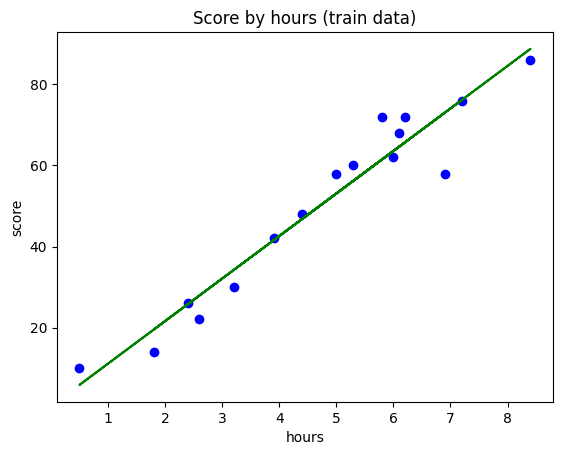

In [123]:
plt.scatter(X_train, y_train, color="blue") # 산점도
plt.plot(X_train, reg.predict(X_train), color = "green") # 선 그래프
plt.title("Score by hours (train data)") #제목

plt.xlabel('hours')
plt.ylabel('score')
plt.show()

<h2>데이터 시각화(테스트 세트)</h2>

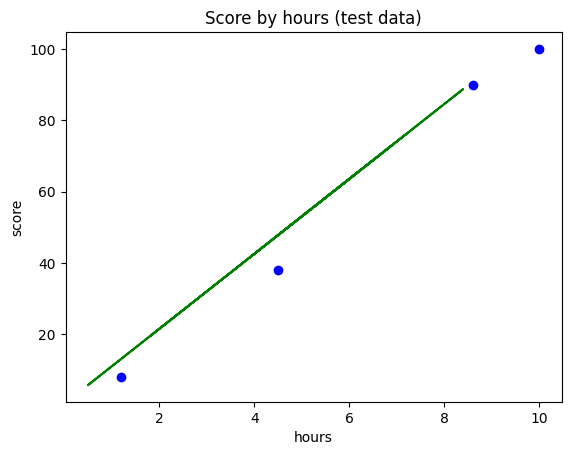

In [124]:
plt.scatter(X_test, y_test, color="blue") # 산점도
plt.plot(X_train, reg.predict(X_train), color = "green") # 선 그래프
plt.title("Score by hours (test data)") #제목

plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [125]:
reg.coef_ # 기울기

array([10.49161294])

In [126]:
reg.intercept_ # y절편

0.6115562905169796

<h3>모델 평가</h3>

In [127]:
reg.score(X_test, y_test) # 테스트 세트를 통한 모델 평가

0.9727616474310156

In [128]:
reg.score(X_train, y_train) # 훈련 세트를 통한 모델 평가

0.9356663661221668